<a href="https://colab.research.google.com/github/dmuman/ML-labs/blob/main/lab5/lab5_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [519]:
import numpy as np
import pandas as pd

In [520]:
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_6_Clustering/Task/AI_index.csv'

df = pd.read_csv(url)

df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,High,Liberal democracy


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                61 non-null     object 
 1   Talent                 61 non-null     float64
 2   Infrastructure         61 non-null     float64
 3   Operating Environment  61 non-null     float64
 4   Research               61 non-null     float64
 5   Development            61 non-null     float64
 6   Government Strategy    61 non-null     float64
 7   Commercial             61 non-null     float64
 8   Total score            61 non-null     float64
 9   Region                 61 non-null     object 
 10  Income group           61 non-null     object 
 11  Political regime       61 non-null     object 
dtypes: float64(8), object(4)
memory usage: 5.8+ KB


In [522]:
indicators = ['Total score', 'Research', 'Development', 'Commercial']
indicators

['Total score', 'Research', 'Development', 'Commercial']

In [523]:
grouped_by_region = df.groupby('Region')[indicators]
grouped_mean = grouped_by_region.mean()
grouped_mean

,Total score,Research,Development,Commercial
Region,,,,
Africa,6.426000,1.342000,4.356000,0.584000
Americas,29.031250,18.385000,17.540000,15.155000
Asia-Pacific,25.792143,20.723571,23.397857,7.032143
Europe,25.618214,17.991071,12.520357,4.387143
Middle East,19.656667,11.323333,9.901667,5.971667


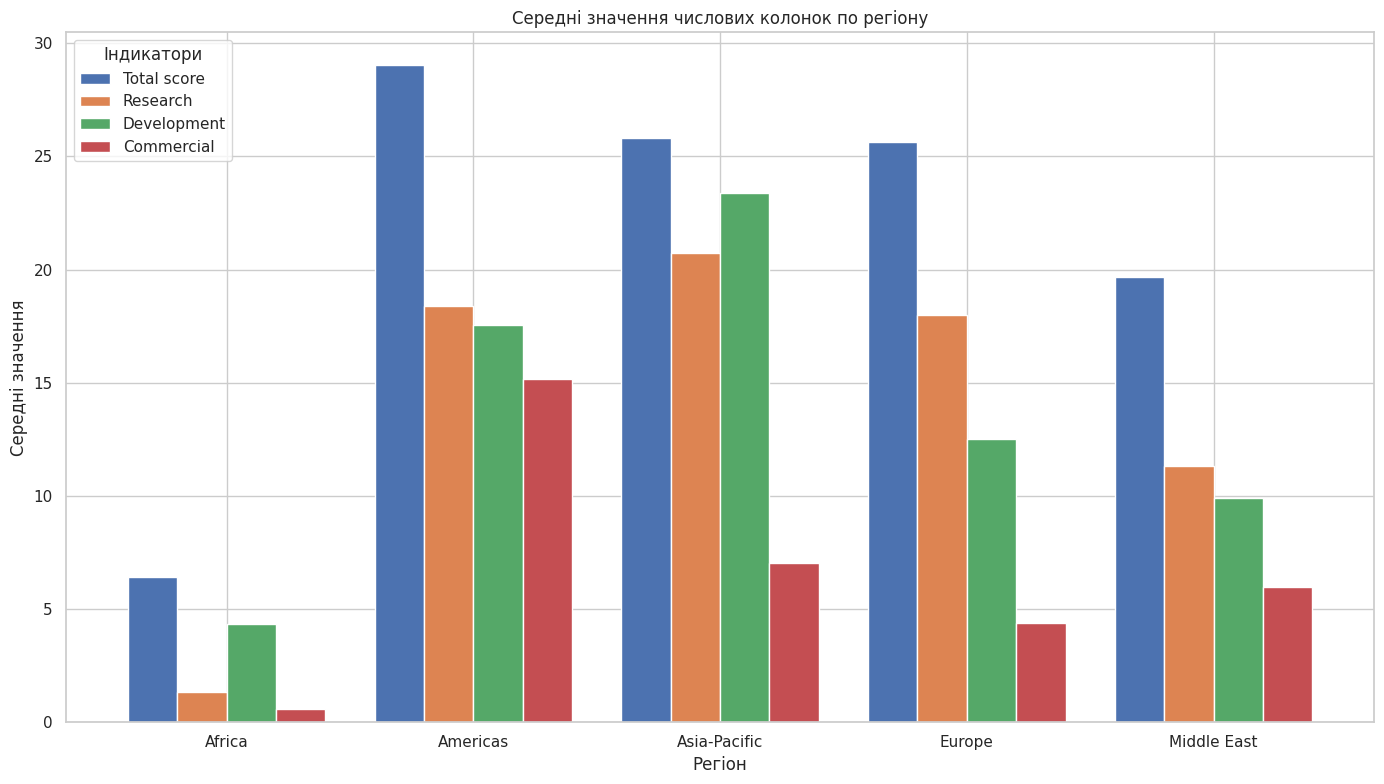

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

grouped_mean.plot(kind='bar', width=0.8, figsize=(14, 8))

plt.title('Середні значення числових колонок по регіону')
plt.xlabel('Регіон')
plt.ylabel('Середні значення')
plt.xticks(rotation=0)
plt.legend(title='Індикатори', loc='upper left')

plt.tight_layout()
plt.show()

In [525]:
columns = [
    # 'Region',
    'Income group', 'Political regime']
for column in columns:
  print(df[column].unique())

['High' 'Upper middle' 'Lower middle']
['Liberal democracy' 'Closed autocracy' 'Electoral democracy'
 'Electoral autocracy']


In [526]:
from sklearn.preprocessing import OrdinalEncoder

custom_order = [
    # ['Africa', 'Middle East', 'Europe', 'Asia-Pacific', 'Americas'],
    ['Lower middle', 'Upper middle', 'High'],
    ['Closed autocracy', 'Electoral autocracy', 'Liberal democracy', 'Electoral democracy']
]

encoder = OrdinalEncoder(categories=custom_order)

df[columns] = encoder.fit_transform(df[columns])

df

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,2.0,2.0
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,1.0,0.0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,2.0,2.0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,2.0,2.0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,0.0,3.0
57,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,0.0,1.0
58,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,0.0,1.0
59,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,0.0,1.0


In [527]:
country_column = df[['Country', 'Region']]
to_standardize = df.drop(df[['Country', 'Region']], axis=1)

In [528]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(to_standardize)
X_stand = scaler.fit_transform(to_standardize)

X_stand

array([[ 5.46713288e+00,  1.50868272e+00, -1.30347680e-01,
         4.78717517e+00,  4.39215507e+00,  7.73999434e-01,
         6.68875405e+00,  5.02949729e+00,  6.04707898e-01,
         1.72670629e-02],
       [-2.39573257e-02,  1.80447075e+00,  1.22573075e+00,
         3.14570678e+00,  3.36021168e+00,  1.44852876e+00,
         2.69474428e+00,  2.57736693e+00, -7.12691451e-01,
        -2.08931461e+00],
       [ 1.49794742e+00,  3.91316254e-01,  3.76236228e-01,
         1.14010580e+00,  5.29708927e-01,  9.83535717e-01,
         9.03218997e-01,  1.12315046e+00,  6.04707898e-01,
         1.72670629e-02],
       [ 9.47457244e-01,  6.69297642e-01,  1.34472023e+00,
         8.05264630e-01,  5.68348845e-01,  1.64648845e+00,
         6.15690247e-01,  1.07421367e+00,  6.04707898e-01,
         1.72670629e-02],
       [ 1.24210432e+00,  2.00884164e-01,  7.67345113e-01,
         9.17835590e-01,  6.80662205e-01, -5.17948033e-01,
         1.50396145e+00,  1.05437442e+00,  6.04707898e-01,
         1.

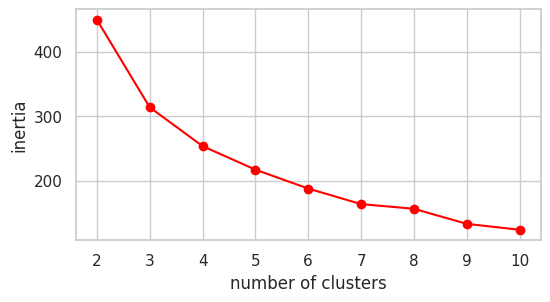

In [529]:
from sklearn.cluster import KMeans
clusters = range(2, 11)
inertias = []

for k in clusters:
  model = KMeans(n_clusters=k, random_state=42)

  model.fit(X_stand)

  inertias.append(model.inertia_)

plt.figure(figsize=(6,3))
plt.plot(clusters, inertias, '-o', color='red')
plt.xlabel('Число кластерів')
plt.ylabel('Інерція')
plt.xticks(clusters)
plt.show()

In [530]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X_stand)

labels = kmeans.predict(X_stand)
labels

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [531]:
df['Cluster'] = labels
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime,Cluster
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,2.0,2.0,2
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,1.0,0.0,0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,2.0,2.0,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,2.0,2.0,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,2.0,2.0,0


In [532]:
df[['Cluster']].value_counts()

,count
Cluster,
0,31
3,22
1,7
2,1


In [533]:
centers = kmeans.cluster_centers_

In [534]:
df.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Income group', 'Political regime', 'Cluster'],
      dtype='object')

In [535]:
columns = ['Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Income group', 'Political regime']
new_df = pd.DataFrame(centers, columns = [columns])
new_df.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Income group,Political regime
0,0.385977,0.578749,0.350388,0.498455,0.438485,0.497381,0.126295,0.511227,0.477218,-0.050687
1,-0.841377,-1.794590,-1.750799,-0.887484,-0.626324,-1.008024,-0.428423,-1.247072,-2.030091,-1.036024
2,5.467133,1.508683,-0.130348,4.787175,4.392155,0.773999,6.688754,5.029497,0.604708,0.017267
3,-0.524672,-0.313080,0.069269,-0.637586,-0.618224,-0.415302,-0.345679,-0.552183,-0.053992,0.400282


In [536]:
mean_values = df.groupby('Cluster')[df.select_dtypes('float').columns].mean()
mean_values

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Income group,Political regime
Cluster,,,,,,,,,,
0,22.742903,75.219355,74.135161,25.328065,23.259355,70.221613,8.020645,31.676774,1.903226,1.935484
1,4.081429,27.237143,32.284286,1.197143,2.591429,31.210000,0.245714,5.088571,0.000000,1.000000
2,100.000000,94.020000,64.560000,100.000000,100.000000,77.390000,100.000000,100.000000,2.000000,2.000000
3,8.896818,57.189091,68.535909,5.548182,2.748636,46.570000,1.405455,15.596364,1.500000,2.363636


In [537]:
clustered_countries = df[['Country', 'Cluster']]
clustered_countries

,Country,Cluster
0,United States of America,2
1,China,0
2,United Kingdom,0
3,Canada,0
4,Israel,0
...,...,...
56,Sri Lanka,1
57,Egypt,1
58,Kenya,1
59,Nigeria,1


In [542]:
cluster_dict = clustered_countries.groupby('Cluster')['Country'].apply(list).to_dict()
cluster_dict

{0: ['China',
  'United Kingdom',
  'Canada',
  'Israel',
  'Singapore',
  'South Korea',
  'The Netherlands',
  'Germany',
  'France',
  'Australia',
  'Ireland',
  'Finland',
  'Denmark',
  'Luxembourg',
  'Japan',
  'India',
  'Switzerland',
  'Sweden',
  'Hong Kong',
  'Spain',
  'Austria',
  'Estonia',
  'Taiwan',
  'Norway',
  'Saudi Arabia',
  'Belgium',
  'Poland',
  'Slovenia',
  'New Zealand',
  'Italy',
  'United Arab Emirates'],
 1: ['Vietnam',
  'Morocco',
  'Sri Lanka',
  'Egypt',
  'Kenya',
  'Nigeria',
  'Pakistan'],
 2: ['United States of America'],
 3: ['Malta',
  'Portugal',
  'Czech Republic',
  'Iceland',
  'Lithuania',
  'Brazil',
  'Greece',
  'Slovakia',
  'Hungary',
  'Malaysia',
  'Mexico',
  'Chile',
  'Argentina',
  'Qatar',
  'Turkey',
  'Colombia',
  'Uruguay',
  'Bahrain',
  'Indonesia',
  'Tunisia',
  'South Africa',
  'Armenia']}

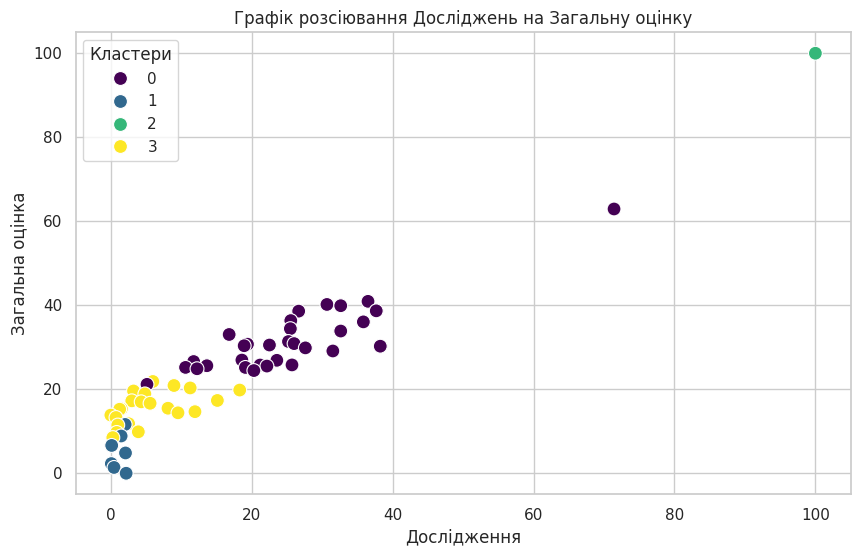

In [539]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Research',
    y='Total score',
    hue='Cluster',
    palette='viridis',
    s=100,
)

plt.title('Графік розсіювання Досліджень на Загальну оцінку')
plt.xlabel('Дослідження')
plt.ylabel('Загальна оцінка')

plt.legend(title='Кластери')
plt.show()

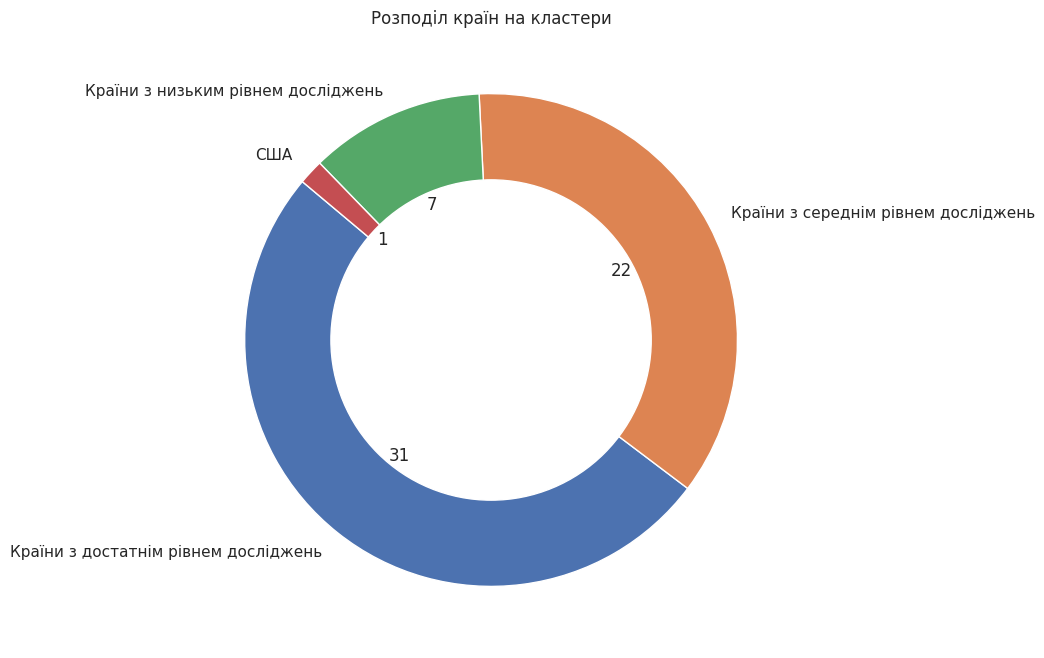

In [550]:
cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(
    cluster_counts,
    autopct=lambda p: f'{int(np.round(p * sum(cluster_counts) / 100, 0))}',
    labels=['Країни з достатнім рівнем досліджень', 'Країни з середнім рівнем досліджень', 'Країни з низьким рівнем досліджень', 'США'],  # Імена кластерів як підписи
    startangle=140
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Розподіл країн на кластери')

plt.show()